<a href="https://colab.research.google.com/github/kimp10/Insurance-Fraud-Detection-Model-/blob/main/Insurance_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [16]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
%cd /content/drive/My Drive/Colab Notebooks/Insurance Fraud Detection project/

/content/drive/My Drive/Colab Notebooks/Insurance Fraud Detection project


##Reading Dataset

In [18]:
Claim_fraud = pd.read_csv('fraud_oracle.csv')

##Analyzing the Data

In [19]:


Claim_fraud.shape

(15420, 33)

The dataset contains 33 columns and 15420 rows.



In [20]:
Claim_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [21]:
Claim_fraud.tail()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [22]:

Claim_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [23]:
Claim_fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

[link text](https://)#####Check for *Duplication*

In [24]:
Claim_fraud.nunique()


,0
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2
MaritalStatus,4


#####Missing Values Calculation

In [25]:
#Checking for null values
Claim_fraud.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


 There is no missing values

In [26]:
Claim_fraud['Make'].value_counts()

,count
Make,
Pontiac,3837
Toyota,3121
Honda,2801
Mazda,2354
Chevrolet,1681
Accura,472
Ford,450
VW,283
Dodge,109


In [27]:
print(Claim_fraud.Make.unique())
print(Claim_fraud.Make.nunique())

['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
19


Some car models are being misspelled incorrectly


In [28]:

replacements = {'Mecedes': 'Mercedes', 'Accura': 'Acura','Nisson':'Nissan','Porche':'Porsche'}
Claim_fraud['Make'] = Claim_fraud['Make'].replace(replacements)

## Exploratory Data Analysis





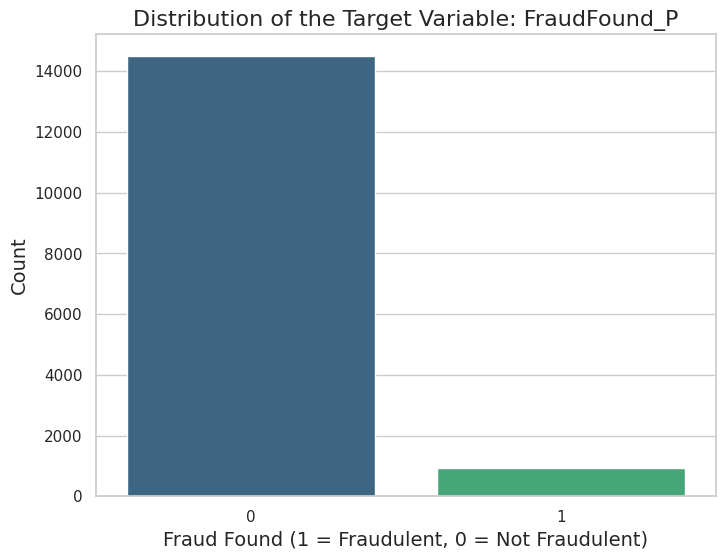

In [29]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of the target variable 'FraudFound_P'
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudFound_P', data=Claim_fraud, palette='viridis')
plt.title('Distribution of the Target Variable: FraudFound_P', fontsize=16)
plt.xlabel('Fraud Found (1 = Fraudulent, 0 = Not Fraudulent)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

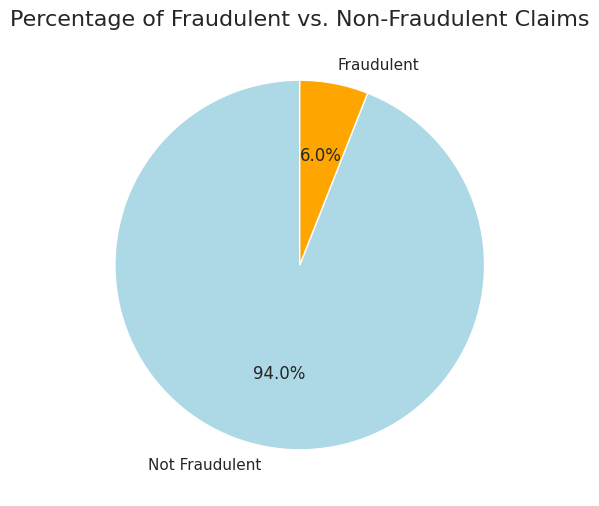

In [30]:

# Calculate counts of fraudulent and non-fraudulent claims
fraud_counts = Claim_fraud['FraudFound_P'].value_counts()

# Create labels for the pie chart
labels = ['Not Fraudulent', 'Fraudulent']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Claims', fontsize=16)
plt.show()


### 1. Time and Date Information

In [31]:
## Function to calculate fraud rate for categorical columns
def fraud_rate_by_category(column):
    return Claim_fraud.groupby(column)['FraudFound_P'].mean().sort_values(ascending=False)

# List of categorical columns to analyze
categorical_columns = [
    'Year','Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
    'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
    'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
    'Days_Policy_Claim', 'AgeOfVehicle', 'AgeOfPolicyHolder',
    'PoliceReportFiled', 'WitnessPresent', 'AgentType',
    'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'
]

# Calculate fraud rates for each categorical column
fraud_rates = {col: fraud_rate_by_category(col) for col in categorical_columns}


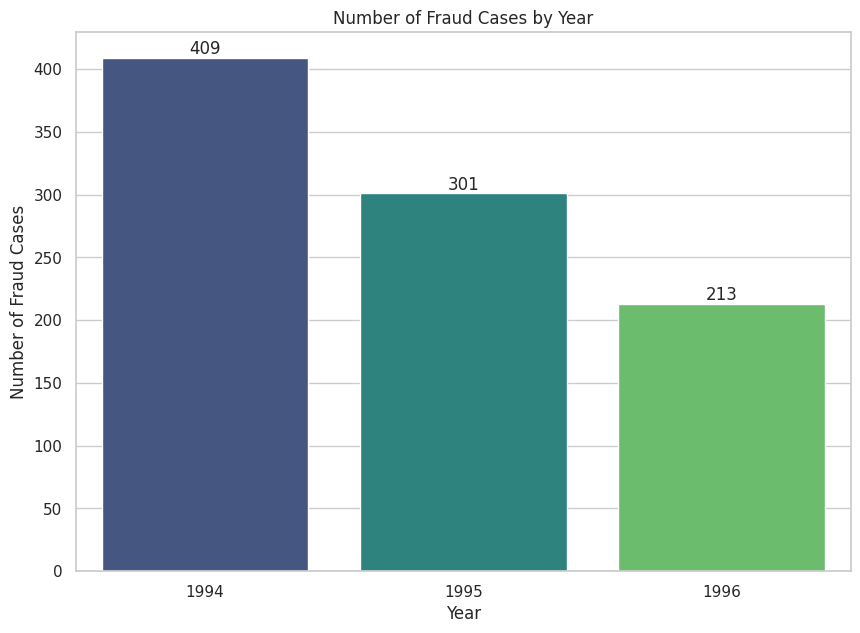

In [32]:
# Function to count fraud cases by column
def count_fraud_cases_by_column(column):
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1][column].value_counts()
plt.figure(figsize=(10, 7))
fraud_count_by_year = count_fraud_cases_by_column('Year')
barplot_witness = sns.barplot(x=fraud_count_by_year.index, y=fraud_count_by_year.values, palette="viridis")
plt.title('Number of Fraud Cases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')

# Add value labels
for index, value in enumerate(fraud_count_by_year.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

####Key Insights:

- Highest Number of Cases in 1994:The year 1994 saw the highest number of fraud cases, with a total of 409 cases. This could indicate a peak in fraudulent activities or improved detection methods during that year.
- Decrease in 1995: The number of fraud cases decreased to 301. This reduction might suggest the impact of enhanced fraud prevention measures or a shift in fraudulent behavior.

- Further Decline in 1996: The trend of decreasing fraud cases continued into 1996, with 213 cases reported. This downward trend could reflect ongoing improvements in fraud detection and prevention strategies, or possibly a change in the methods used by fraudsters that made detection more challenging.

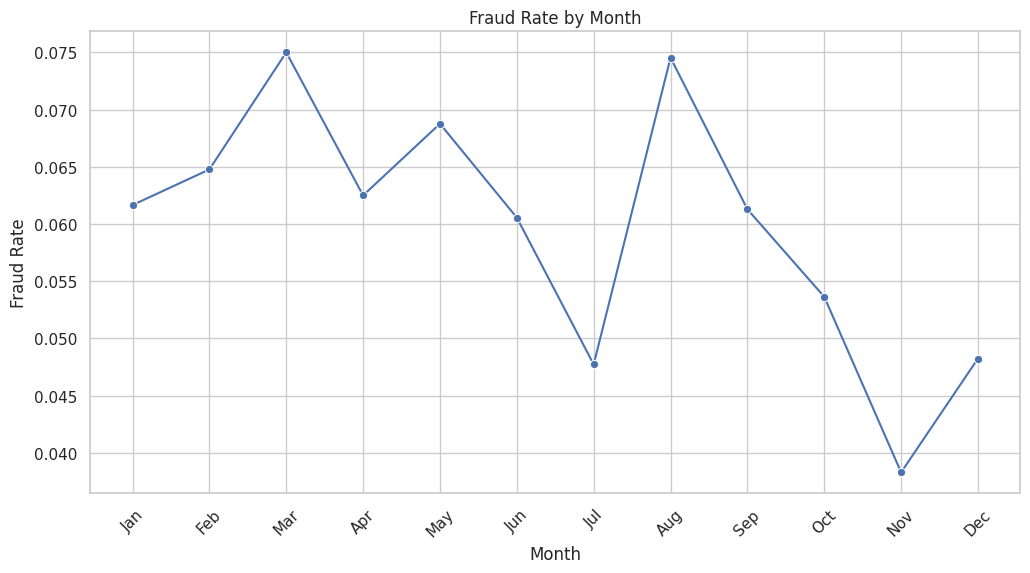

In [33]:

def convert_to_percentage(fraud_rates):
  return fraud_rates*100
# Set the style for the plots
sns.set(style="whitegrid")

# Line Plot Fraud Rate by Month
plt.figure(figsize=(12, 6))
fraud_rate_by_month = fraud_rates['Month']

# Convert index to categorical with correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fraud_rate_by_month.index = pd.CategoricalIndex(fraud_rate_by_month.index, categories=month_order, ordered=True)
fraud_rate_by_month = fraud_rate_by_month.sort_index()

sns.lineplot(x=fraud_rate_by_month.index, y=fraud_rate_by_month.values, marker='o')
plt.title('Fraud Rate by Month')
plt.ylabel('Fraud Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Overall Trend: The fraud rate fluctuates throughout the year, indicating varying levels of fraudulent activity each month.
High Points: The highest fraud rates are observed in March and August, both just below 0.075. This could suggest that these months are particularly vulnerable to fraud, possibly due to specific events or seasonal factors.
Low Points: The lowest fraud rate is seen in November, at approximately 0.040. This indicates a significant reduction in fraudulent activities towards the end of the year.
- Mid-Year Fluctuations: There are notable peaks and troughs in the fraud rate around mid-year, with a peak in August followed by a decline in September and September. This pattern might be worth investigating to understand the causes behind these fluctuations.
- Gradual Decrease: After the peak in August , there is a gradual decrease in the fraud rate, reaching its lowest point in November. This steady decline could indicate effective fraud prevention measures being implemented over the latter half of the year.




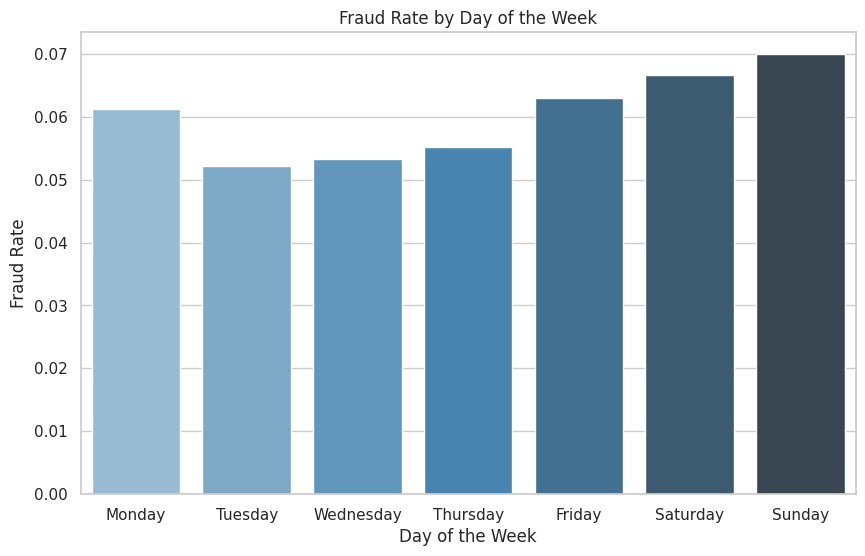

In [35]:
# Plot Fraud Rate by Day of the Week
plt.figure(figsize=(10, 6))
fraud_rate_by_dayofweek = fraud_rates['DayOfWeek']

# Define the desired order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the index to a categorical with the specified order
fraud_rate_by_dayofweek.index = pd.CategoricalIndex(fraud_rate_by_dayofweek.index, categories=day_order, ordered=True)
fraud_rate_by_dayofweek = fraud_rate_by_dayofweek.sort_index()  # Sort the Series based on the new index

sns.barplot(x=fraud_rate_by_dayofweek.index, y=fraud_rate_by_dayofweek.values, palette="Blues_d")
plt.title('Fraud Rate by Day of the Week')
plt.ylabel('Fraud Rate')
plt.xlabel('Day of the Week')
plt.show()

- Highest Fraud Rate: Sunday has the highest fraud rate, reaching up to 0.07. This could indicate that fraudulent activities are more prevalent on weekends, possibly due to reduced monitoring or other factors.
Lowest Fraud Rate: Monday shows one of the lowest fraud rates, suggesting that fraudulent activities are less common at the beginning of the week. This might be due to increased vigilance or other operational factors.
- Mid-Week Stability: The fraud rates for Tuesday, Wednesday, and Thursday are relatively stable and lower compared to the weekend. This consistency could indicate regular monitoring and preventive measures during these days.
- Weekend Spike: There is a noticeable increase in fraud rates on Saturday and Sunday. This pattern might be worth investigating to understand the causes behind the spike and to implement targeted measures for these days.
- Overall Pattern: The data suggests a pattern where fraud rates are lower during the weekdays and higher during the weekends. Understanding this pattern can help in planning and allocating resources more effectively to combat fraud.

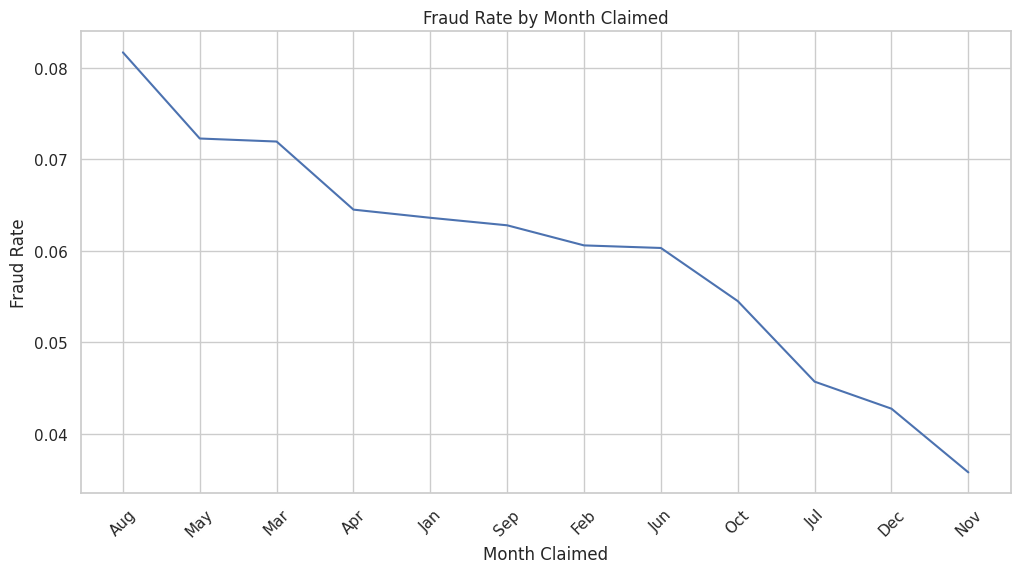

In [ ]:
# Line Plot Fraud Rate by Month Claimed
plt.figure(figsize=(12, 6))
fraud_rate_by_month_claimed = fraud_rates['MonthClaimed'].drop('0')
sns.lineplot(x=fraud_rate_by_month_claimed.index, y=fraud_rate_by_month_claimed.values)
plt.title('Fraud Rate by Month Claimed')
plt.ylabel('Fraud Rate')
plt.xlabel('Month Claimed')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Month claimed highest fraud rates are in August  followed by May

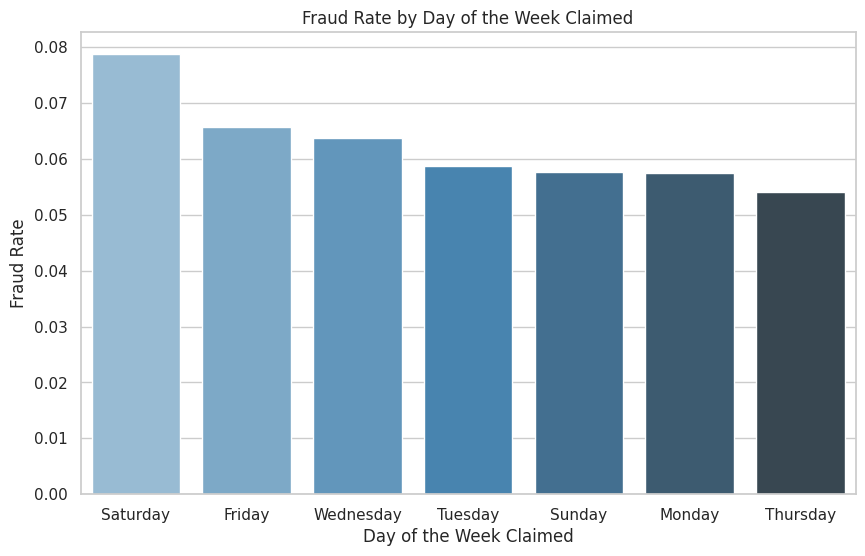

In [ ]:
# Plot Fraud Rate by Day of the Week Claimed
plt.figure(figsize=(10, 6))
fraud_rate_by_dayofweek_claimed = fraud_rates['DayOfWeekClaimed'].drop('0')
sns.barplot(x=fraud_rate_by_dayofweek_claimed.index, y=fraud_rate_by_dayofweek_claimed.values, palette="Blues_d")
plt.title('Fraud Rate by Day of the Week Claimed')
plt.ylabel('Fraud Rate')
plt.xlabel('Day of the Week Claimed')
# Add value labels

plt.show()

Day of the week claimed, Highest fraud rate is on Saturday followed by Friday.

## 2. Vehicle Information

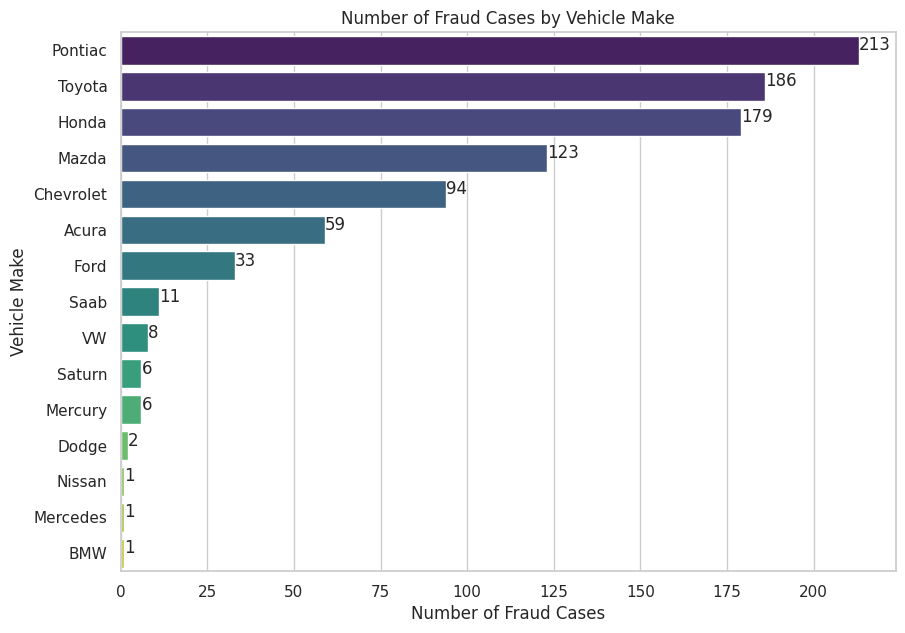

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases
def count_fraud_cases(column):
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1][column].value_counts()

# Horizontal Bar Plot Number of Fraud Cases by Vehicle Make
plt.figure(figsize=(10, 7))
fraud_count_by_make = count_fraud_cases('Make')
sns.barplot(x=fraud_count_by_make.values, y=fraud_count_by_make.index, palette="viridis")
plt.title('Number of Fraud Cases by Vehicle Make')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Vehicle Make')
# Add value labels
for index, value in enumerate(fraud_count_by_make.values):
    plt.text(value, index, str(value))
plt.show()

Pontiac has the highest number of fraud cases followed by Toyota

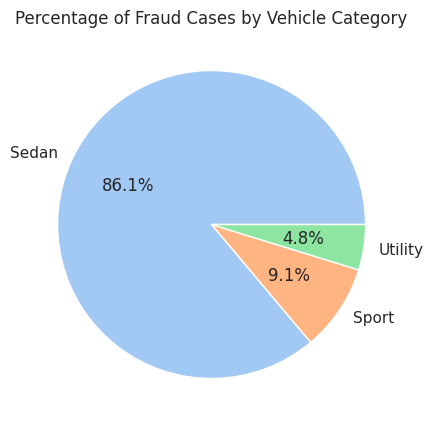

In [ ]:
# Pie Chart Number of Fraud Cases by Vehicle Category
plt.figure(figsize=(8, 5))
fraud_count_by_category = count_fraud_cases('VehicleCategory')
plt.pie(fraud_count_by_category.values, labels=fraud_count_by_category.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Percentage of Fraud Cases by Vehicle Category')
plt.show()

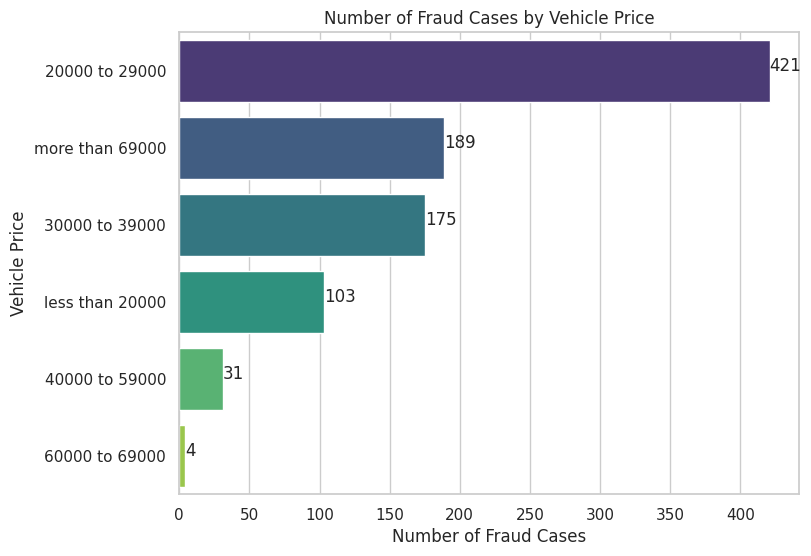

In [ ]:
# Horizontal Bar Plot Number of Fraud Cases by Vehicle Price
plt.figure(figsize=(8, 6))
fraud_count_by_price = count_fraud_cases('VehiclePrice')
sns.barplot(x=fraud_count_by_price.values, y=fraud_count_by_price.index, palette="viridis")
plt.title('Number of Fraud Cases by Vehicle Price')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Vehicle Price')
# Add value labels
for index, value in enumerate(fraud_count_by_price.values):
    plt.text(value, index, str(value))
plt.show()

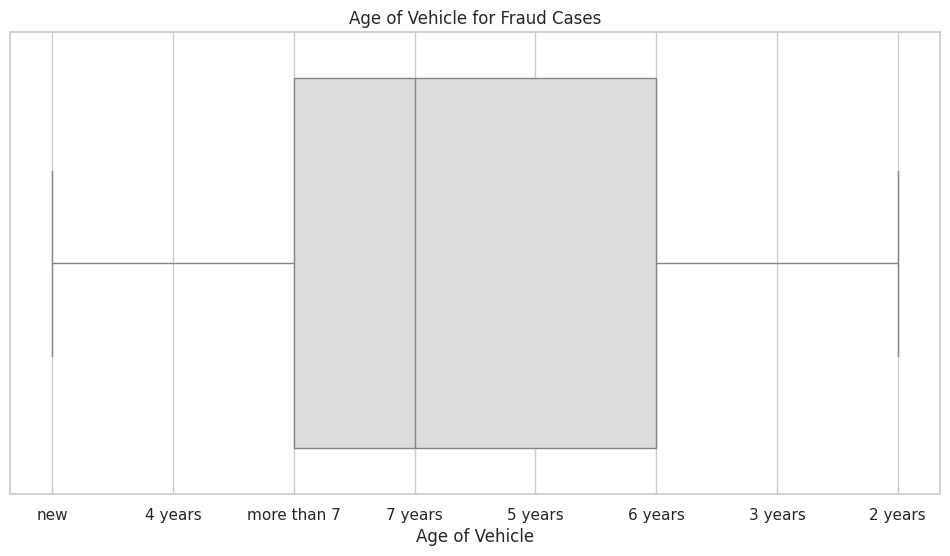

In [ ]:
# Box Plot of Age of Vehicle for Fraud Cases
plt.figure(figsize=(12, 6))
fraud_cases_age_of_vehicle = Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['AgeOfVehicle']
sns.boxplot(x=fraud_cases_age_of_vehicle, palette="coolwarm")
plt.title('Age of Vehicle for Fraud Cases')
plt.xlabel('Age of Vehicle')
plt.show()

- Concentration Around 5 to 7 Years - The majority of fraud cases involve vehicles that are around 5 to 7 years old. This suggests that vehicles within this age range might be more likely to be involved in fraudulent activities, possibly due to higher repair costs or the vehicles nearing the end of their usable life.
- There are noticeable outliers, including new vehicles and those older than 7 years. While less common, fraud cases involving these vehicles indicate that fraudulent activities can span across different vehicle ages.
- Fraudulent cases are not limited to a specific vehicle age. Vehicles as new as 2 years and as old as more than 7 years are also involved, highlighting that fraud can occur at any stage of a vehicle's life.

*Possible Explanations:*
- Repair and Maintenance Costs: Vehicles around 5 to 7 years old may require significant repairs, making them more susceptible to inflated claims or fraudulent activities.
- Depreciation and Market Value: As vehicles age, their market value depreciates, which might drive some policyholders to commit fraud to recoup perceived losses

## 3. Policy Information



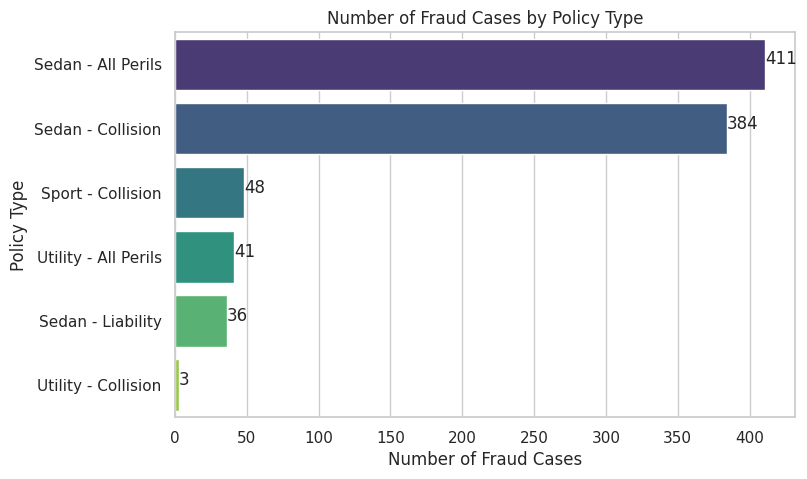

In [ ]:
# Horizontal Bar Plot Number of Fraud Cases by Policy Type
plt.figure(figsize=(8, 5))
fraud_count_by_policy_type = count_fraud_cases('PolicyType')
sns.barplot(x=fraud_count_by_policy_type.values, y=fraud_count_by_policy_type.index, palette="viridis")
plt.title('Number of Fraud Cases by Policy Type')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Policy Type')
for index, value in enumerate(fraud_count_by_policy_type.values):
    plt.text(value, index, str(value))
plt.show()

### 4. Personal Information

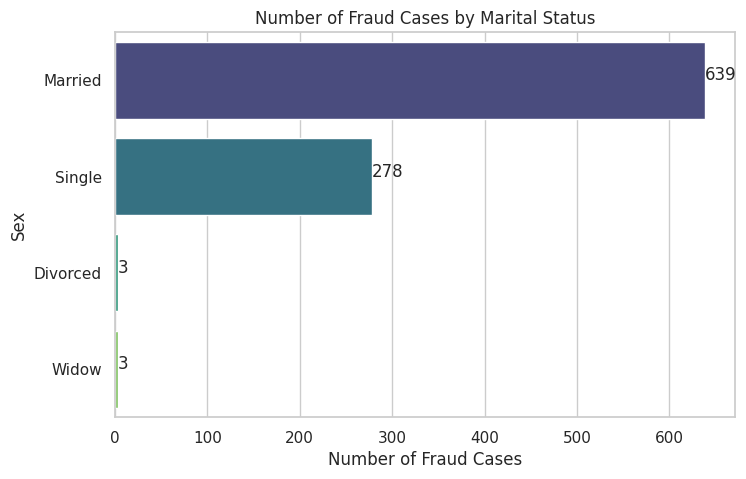

In [ ]:


# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases by sex
def count_fraud_cases_by_sex():
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['MaritalStatus'].value_counts()

# Horizontal Bar Plot Number of Fraud Cases by Sex
plt.figure(figsize=(8, 5))
fraud_count_by_sex = count_fraud_cases_by_sex()
sns.barplot(x=fraud_count_by_sex.values, y=fraud_count_by_sex.index, palette="viridis")
plt.title('Number of Fraud Cases by Marital Status')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Sex')
for index, value in enumerate(fraud_count_by_sex.values):
    plt.text(value, index, str(value))
plt.show()


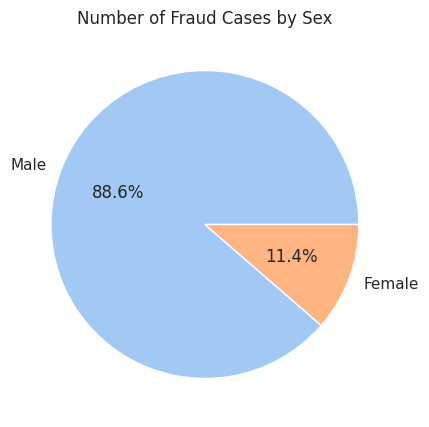

Sex
Male      818
Female    105
Name: count, dtype: int64


In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases by marital status
def count_fraud_cases_by_marital_status():
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['Sex'].value_counts()

# Pie Chart Number of Fraud Cases by Marital Status
plt.figure(figsize=(8, 5))
fraud_count_by_marital_status = count_fraud_cases_by_marital_status()
plt.pie(fraud_count_by_marital_status.values, labels=fraud_count_by_marital_status.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Number of Fraud Cases by Sex')
plt.show()

# Print the count of fraud cases by marital status
print(fraud_count_by_marital_status)

In [ ]:
fraud_count_by_marital_status

,count
Sex,
Male,818
Female,105


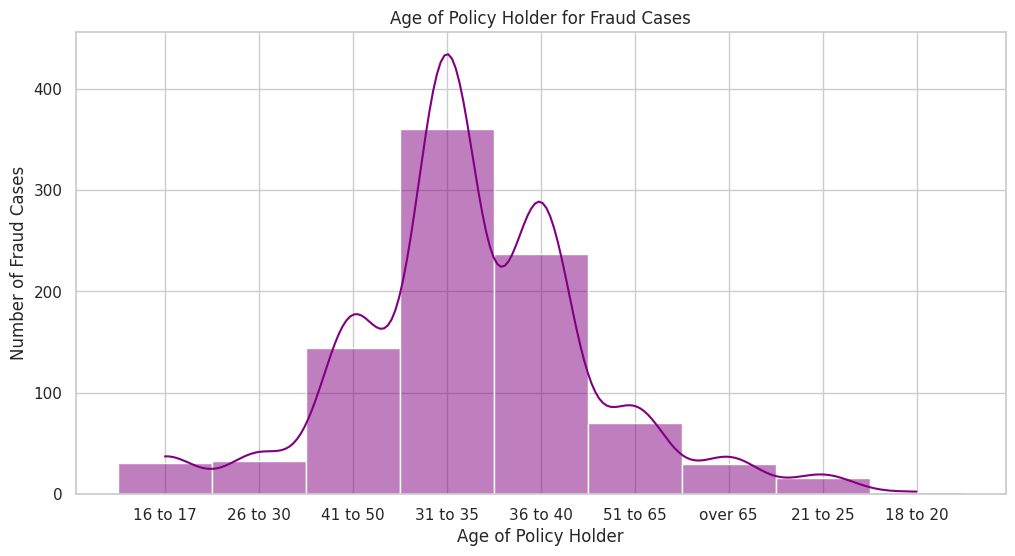

count          923
unique           9
top       31 to 35
freq           360
Name: AgeOfPolicyHolder, dtype: object


In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Filter data for fraud cases
fraud_cases_age_of_policy_holder = Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['AgeOfPolicyHolder']

# Histogram of Age of Policy Holder for Fraud Cases
plt.figure(figsize=(12, 6))
sns.histplot(fraud_cases_age_of_policy_holder, kde=True, bins=20, color="purple")
plt.title('Age of Policy Holder for Fraud Cases')
plt.xlabel('Age of Policy Holder')
plt.ylabel('Number of Fraud Cases')
plt.show()

# Print summary statistics for age of policy holder in fraud cases
print(fraud_cases_age_of_policy_holder.describe())

#### Key insights:

- The histogram highlights key age groups where fraud cases are most prevalent.

*   Middle-aged policyholders, particularly those aged 31-35 and 41-50, are more frequently involved in fraud.
*   Younger policyholders, particularly those in the 18-20 and 21-25 age groups, show very low numbers of fraud cases. This suggests that younger individuals are less likely to commit fraud or perhaps have fewer policies.
*   Older policyholders, especially those over 65, also exhibit fewer fraud cases, indicating less involvement in fraudulent activities.
*   The age groups 26-30 and 36-40 have moderate numbers of fraud cases. While they do not peak as high as the 31-35 or 41-50 age groups, they still represent significant portions of the fraud cases.
*    The KDE line provides a smooth estimate of the distribution, reinforcing the observation of peaks around the ages 31-35 and 41-50.
*   The KDE also shows a gradual decrease in fraud cases as age increases beyond 50, supporting the idea that older policyholders are less involved in fraud












### 5. Accident and Claim Details

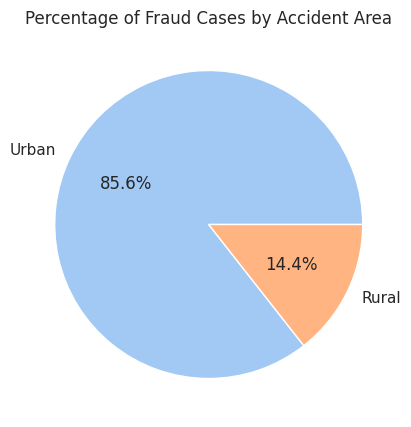

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases by column
def count_fraud_cases_by_column(column):
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1][column].value_counts()

# Pie Chart for Accident Area
plt.figure(figsize=(8, 5))
fraud_count_by_accident_area = count_fraud_cases_by_column('AccidentArea')
plt.pie(fraud_count_by_accident_area.values, labels=fraud_count_by_accident_area.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Percentage of Fraud Cases by Accident Area')
plt.show()

##### Key Insights:

 - Urban Area Dominance:
    The chart shows that a significant majority of fraud cases, approximately 85.6%,
     occur in urban areas. This indicates that fraud incidents are more prevalent in
      urban settings compared to rural areas.
 - Rural Area Representation:
   In contrast, only 14.4% of fraud cases are reported in rural areas. This lower
      percentage could be due to various factors such as lower population density,
      fewer vehicles, or different reporting practices in rural regions.

 - Possible Explanations:
 Higher Traffic and Population Density in Urban Areas:
    Urban areas generally have higher traffic volumes and population densities, which
    might lead to more frequent accidents and, consequently, more opportunities for fraudulent claims.

 - Different Fraud Detection Mechanisms:
    The infrastructure and resources available for detecting and reporting fraud might
    differ between urban and rural areas, potentially leading to higher detection rates in urban settings.

 - Economic Factors:
    Urban areas might have more vehicles insured and possibly higher economic activity, which can influence the number of claims filed and the potential for fraud.



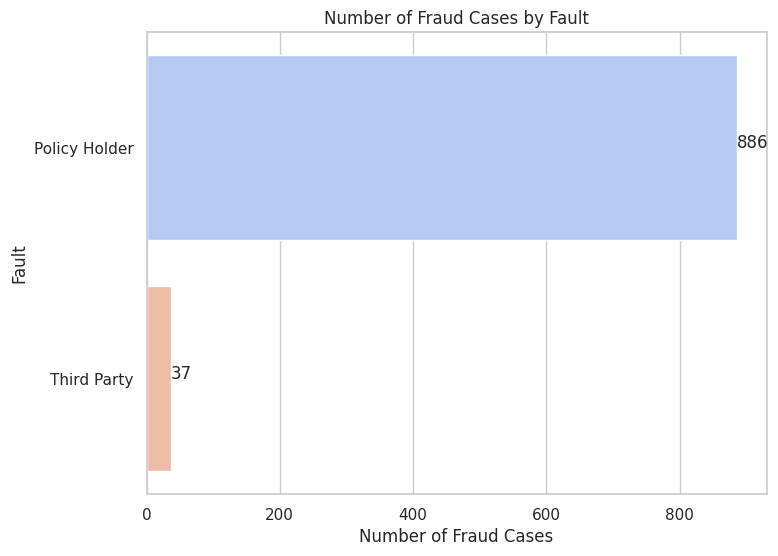

In [ ]:
# Horizontal Bar Plot for Fault with Value Labels
plt.figure(figsize=(8, 6))
fraud_count_by_fault = count_fraud_cases_by_column('Fault')
barplot_fault = sns.barplot(x=fraud_count_by_fault.values, y=fraud_count_by_fault.index, palette="coolwarm")
plt.title('Number of Fraud Cases by Fault')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Fault')

# Add value labels
for index, value in enumerate(fraud_count_by_fault.values):
    plt.text(value, index, str(value))

plt.show()

#### Key Insights
 cases where the fault lies with the policyholder and cases where the fault is attributed to a third party.


 - Policy Holder Fault: A vast majority of fraud cases, totaling 886, involve fault attributed to the policyholder. This suggests that
 policyholders might be more likely to file fraudulent claims when they are at fault in an accident.

- Third Party Fault: In contrast, there are only 37 fraud cases where the fault is attributed to a third party. This lower number indicates that fraud cases are significantly less common in scenarios where the policyholder is not at fault.
- Possible Explanations:  Incentive to Avoid Liability:Policyholders might have a greater incentive to commit fraud in order to avoid liability and financial consequences associated with being at fault in an accident.
    




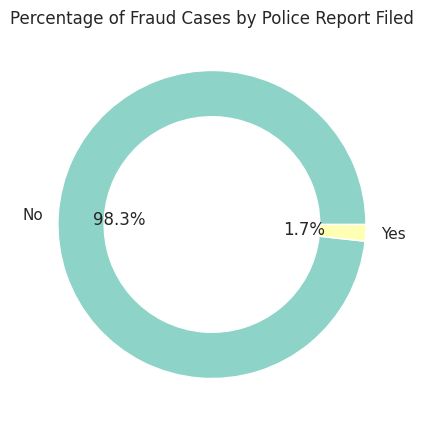

In [ ]:
# Donut Chart for Police Report Filed
plt.figure(figsize=(8, 5))
fraud_count_by_police_report = count_fraud_cases_by_column('PoliceReportFiled')
plt.pie(fraud_count_by_police_report.values, labels=fraud_count_by_police_report.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"), wedgeprops=dict(width=0.3))
plt.title('Percentage of Fraud Cases by Police Report Filed')
plt.show()

#### Key Insights:

- Majority of Cases Without Police Reports: The chart reveals that 98.3% of fraud cases did not have a police report filed. This suggests that most fraudulent claims are made without the involvement of law enforcement.
-Minority of Cases With Police Reports: Only 1.7% of fraud cases had a police report filed. This indicates that very few fraud cases involve official police documentation.
-Possible Explanations: Lack of Necessity or Deterrence:
    Policyholders committing fraud may avoid filing police reports to prevent additional scrutiny and legal consequences.

    Fraudulent Intent: Fraudsters might perceive that filing a police report could complicate their fraudulent claim, leading to potential exposure and investigation.


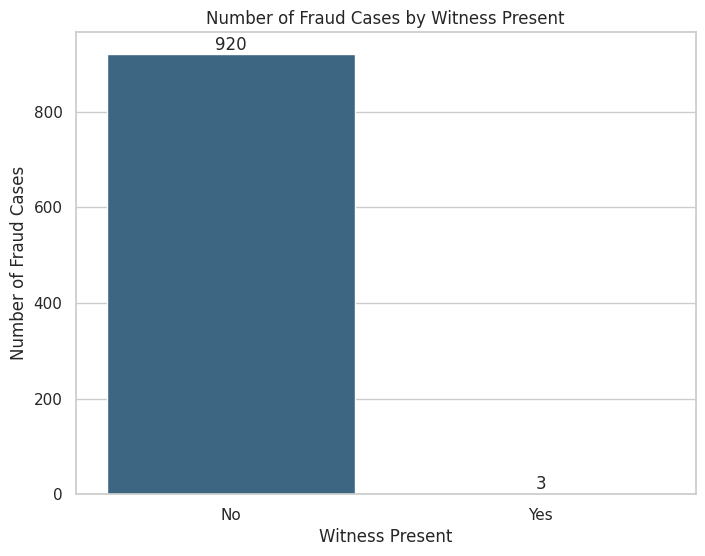

In [ ]:
# Bar Plot for Witness Present with Value Labels
plt.figure(figsize=(8, 6))
fraud_count_by_witness_present = count_fraud_cases_by_column('WitnessPresent')
barplot_witness = sns.barplot(x=fraud_count_by_witness_present.index, y=fraud_count_by_witness_present.values, palette="viridis")
plt.title('Number of Fraud Cases by Witness Present')
plt.xlabel('Witness Present')
plt.ylabel('Number of Fraud Cases')

# Add value labels
for index, value in enumerate(fraud_count_by_witness_present.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Key Insights

- Majority of Cases Without Witnesses:The chart reveals that a significant majority, 920 fraud cases, occurred without any witnesses present. This suggests that most fraudulent claims are made without the corroboration of an external observer.
- Minority of Cases With Witnesses: Only 3 fraud cases had witnesses present. This indicates that very few fraud cases involve a third party who can verify the circumstances of the incident.

- Possible Explanations: Lack of Verification:
    Fraudsters might avoid involving witnesses to prevent any contradictory statements that could expose their fraudulent activities.

     Fraudulent Intent: The absence of witnesses can make it easier for fraudsters to fabricate or exaggerate details of the incident without the risk of being disputed by an independent party.





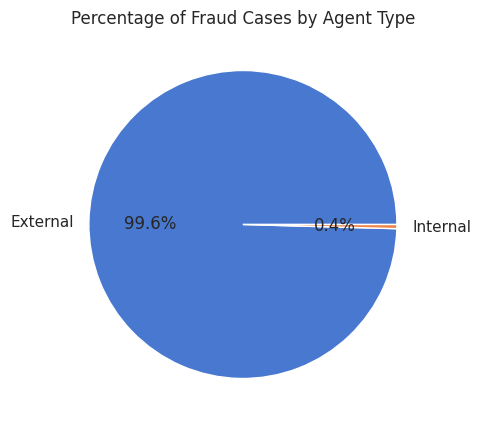

In [ ]:
# Pie Chart for Agent Type
plt.figure(figsize=(8, 5))
fraud_count_by_agent_type = count_fraud_cases_by_column('AgentType')
plt.pie(fraud_count_by_agent_type.values, labels=fraud_count_by_agent_type.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Percentage of Fraud Cases by Agent Type')
plt.show()


# Feature Engineering

While doing data analysis there are few things that I have noticed within the data that we need to look at.

- DayOfWeekClaimed - contains a 0 instead of a day of the week
- MonthClaimed - contains a 0 instead of the month
- Age - contains a 0 instead of the necessary age
- PolicyType - appears to be a concatenation of VehicleCategory and BasePolicy
- PolicyNumber - determine if they are the same as the row number minus 1

In [ ]:
Claim_fraud["DayOfWeekClaimed"].value_counts()

,count
DayOfWeekClaimed,
Monday,3757
Tuesday,3375
Wednesday,2951
Thursday,2660
Friday,2497
Saturday,127
Sunday,52


In [ ]:
Claim_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
Claim_fraud["FraudFound_P"].value_counts()

,count
FraudFound_P,
0,14496
1,923


In [ ]:
Claim_fraud["MonthClaimed"].value_counts()

,count
MonthClaimed,
Jan,1446
May,1411
Mar,1348
Oct,1339
Jun,1293
Feb,1287
Nov,1285
Apr,1271
Sep,1242


In [ ]:
Claim_fraud[Claim_fraud["MonthClaimed"] =='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:






Claim_fraud[Claim_fraud["Age"] ==0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


There is one row with 0 as month claimed and 0 as day of week claimed. So I am gonna drop it

---



In [ ]:
Claim_fraud = Claim_fraud.loc[Claim_fraud['DayOfWeekClaimed']!='0']


In [ ]:
Claim_fraud.reset_index(drop=True, inplace=True)


In [ ]:

Claim_fraud.shape

(15419, 33)

In [ ]:
#There are 319 rows where the feature Age is assigned a zero,
print(len(Claim_fraud[Claim_fraud['Age']==0]))

#though for the displayed rows the policy holder is said to be between 16 and 17 years old.
Claim_fraud.loc[Claim_fraud['Age']==0, 'AgeOfPolicyHolder']

#Need to check the policy holders age and then reassign a value.
Claim_fraud_age0_idx = (Claim_fraud['Age']==0)

319


In [ ]:
#confirms that every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.
Claim_fraud.loc[(Claim_fraud['Age']==0),'AgeOfPolicyHolder'].unique()


array(['16 to 17'], dtype=object)

In [ ]:
Claim_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
Claim_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

`
#### Separating features and target variable

In [ ]:

X = Claim_fraud.drop('FraudFound_P', axis=1)
y = Claim_fraud['FraudFound_P']

#### Encoding Categorical and Numerical Variables





In [ ]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
categorical_cols

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [ ]:
numerical_cols

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [ ]:
# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

#### Scaling Numerical Features

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12335, 32), (3084, 32), (12335,), (3084,))

#### Dealing with class imbalance

In [ ]:
# Addressing class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
# Random Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

### Near Miss

In [ ]:
# NearMiss Undersampling
Nearmiss = NearMiss(version=1, n_neighbors=3, n_jobs=-1)
X_train_near, y_train_near = Nearmiss.fit_resample(X_train, y_train)


# Modelling






#### Random Forest Classifier

In [ ]:
# Initializing and training the Random Forest model
RandomF = RandomForestClassifier(random_state=42)
RandomF.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:

# Making predictions on the test set
y_pred_Random = RandomF.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_Random = accuracy_score(y_test, y_pred_Random)
conf_matrix_Random = confusion_matrix(y_test, y_pred_Random)
class_report_Random = classification_report(y_test, y_pred_Random)

In [ ]:
# Display results
print(f'Accuracy: {accuracy_Random:.4f}')
print('Classification Report:')
print(class_report_Random)

Accuracy: 0.9232
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2885
           1       0.25      0.10      0.14       199

    accuracy                           0.92      3084
   macro avg       0.60      0.54      0.55      3084
weighted avg       0.90      0.92      0.91      3084



In [ ]:
from sklearn.metrics import precision_recall_curve, auc, recall_score, precision_score, f1_score, confusion_matrix

# Calculate AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_Random)
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

AUC-PR: 0.20192157284476858


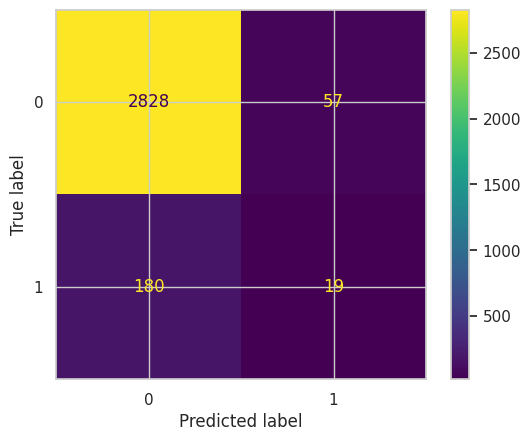

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_Random,
                              display_labels=RandomF.classes_)
disp.plot()

plt.show()

The overall accuracy of the model is quite high at 92.32%, indicating that the model is making correct predictions for a large majority of the samples. The model is very good at predicting samples from class 0 (majority class), as indicated by the high number of true negatives (2828).
However, the model struggles with predicting samples from class 1 (minority class), as indicated by the high number of false negatives (180) and the low number of true positives (19).



*   True Negatives (TN): 2828 samples from class 0 were correctly predicted as class 0.


*  False Positives (FP): 57 samples from class 0 were incorrectly predicted as class 1.


*  False Negatives (FN): 180 samples from class 1 were incorrectly predicted as class 0.


*  True Positives (TP): 19 samples from class 1 were correctly predicted as class 1.
  



### With Under sampling

In [ ]:
# Initializing and training the Random Forest model
RandomUnder = RandomForestClassifier(random_state=42)
RandomUnder.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred_under = RandomUnder.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_under = accuracy_score(y_test, y_pred_under)
conf_matrix_under = confusion_matrix(y_test, y_pred_under)
class_report_under = classification_report(y_test, y_pred_under)

In [ ]:
# Display results
print(f'Accuracy: {accuracy_under:.4f}')
print('Classification Report:')
print(class_report_under)

Accuracy: 0.6595
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      2885
           1       0.15      0.92      0.26       199

    accuracy                           0.66      3084
   macro avg       0.57      0.78      0.52      3084
weighted avg       0.94      0.66      0.75      3084



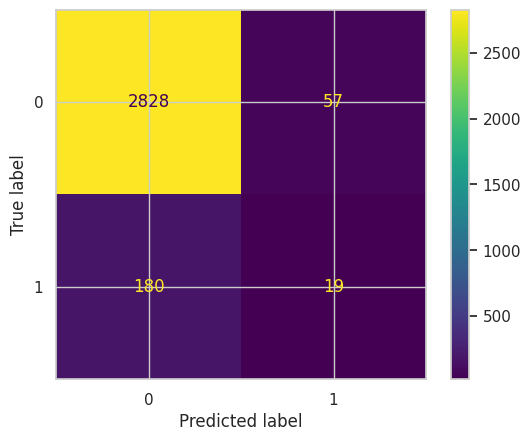

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_Random,
                              display_labels=RandomUnder.classes_)
disp.plot()

plt.show()

### With Near Miss







#### Logistic *Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)


In [ ]:
# Train the model on the balanced dataset
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_lg = logreg_model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_lg = accuracy_score(y_test, y_pred_lg)
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
class_report_lg = classification_report(y_test, y_pred_lg)

In [ ]:
# Display results
print(f'Accuracy: {accuracy_lg:.4f}')
print('Classification Report:')
print(class_report_lg)

Accuracy: 0.7831
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2885
           1       0.16      0.54      0.24       199

    accuracy                           0.78      3084
   macro avg       0.56      0.67      0.56      3084
weighted avg       0.91      0.78      0.83      3084



In [ ]:

# Calculate AUC-PR
precision_lg, recall_lg, _ = precision_recall_curve(y_test, y_pred_lg)
auc_pr = auc(recall_lg, precision_lg)
print("AUC-PR:", auc_pr)

AUC-PR: 0.36197628927855424


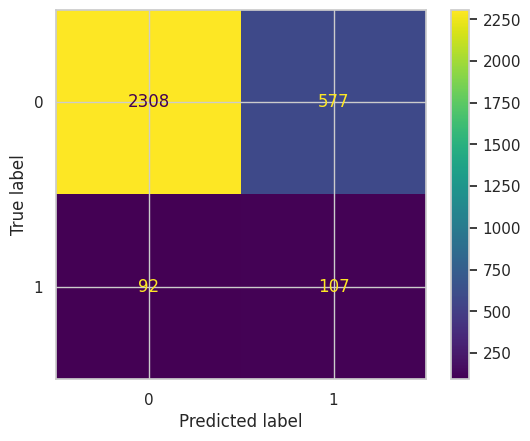

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lg,
                              display_labels=logreg_model.classes_)
disp.plot()

plt.show()

#### *XGBoost*

In [ ]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

In [ ]:
# Train the model on the training set
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

In [ ]:




# Calculate AUC-PR
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
auc_xgb = auc(recall_xgb, precision_xgb)
print("AUC-PR:", auc_xgb)

AUC-PR: 0.5164212297358574


In [ ]:
# Display results
print(f'Accuracy: {accuracy_xgb:.4f}')
print('Classification Report:')
print(class_report_xgb)

Accuracy: 0.9458
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2885
           1       0.73      0.26      0.38       199

    accuracy                           0.95      3084
   macro avg       0.84      0.62      0.68      3084
weighted avg       0.94      0.95      0.93      3084



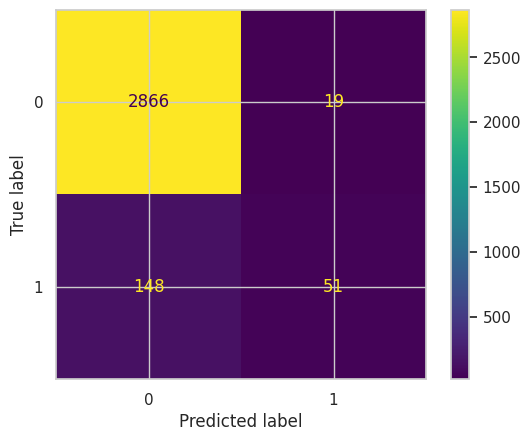

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb,
                              display_labels=xgb_model.classes_)
disp.plot()

plt.show()

### With Under sampling

In [ ]:
import xgboost as xgb
# Create an XGBoost model
xgb_under = xgb.XGBClassifier(random_state=42)

In [ ]:
# Train the model on the training set
xgb_under.fit(X_train_under, y_train_under)

# Make predictions on the test set
y_pred_xgb_under = xgb_under.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_xgb_under = accuracy_score(y_test, y_pred_xgb_under)
conf_matrix_xgb_under = confusion_matrix(y_test, y_pred_xgb_under)
class_report_xgb_under = classification_report(y_test, y_pred_xgb_under)

In [ ]:
# Display results
print(f'Accuracy: {accuracy_xgb_under:.4f}')
print('Classification Report:')
print(class_report_xgb_under)

Accuracy: 0.7659
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      2885
           1       0.20      0.89      0.33       199

    accuracy                           0.77      3084
   macro avg       0.60      0.83      0.59      3084
weighted avg       0.94      0.77      0.82      3084



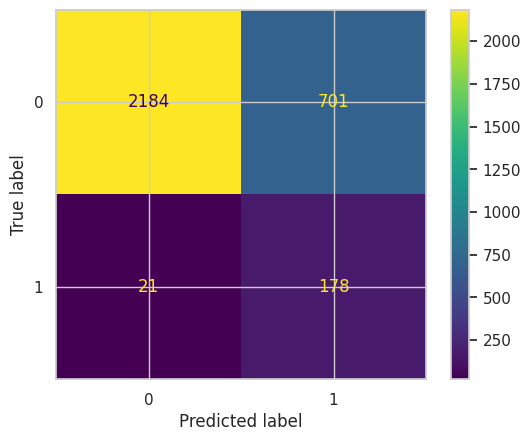

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb_under,
                              display_labels=xgb_under.classes_)
disp.plot()

plt.show()

### With Near Miss

In [ ]:
import xgboost as xgb
# Create an XGBoost model
xgb_near = xgb.XGBClassifier(random_state=42)

In [ ]:
# Train the model on the training set
xgb_near.fit(X_train_near, y_train_near)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred_xgb_near = xgb_near.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_xgb_near = accuracy_score(y_test, y_pred_xgb_near)
conf_matrix_xgb_near = confusion_matrix(y_test, y_pred_xgb_near)
class_report_xgb_near = classification_report(y_test, y_pred_xgb_near)

In [ ]:
# Display results
print(f'Accuracy: {accuracy_xgb_near:.4f}')
print('Classification Report:')
print(class_report_xgb_near)

Accuracy: 0.6349
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76      2885
           1       0.13      0.83      0.23       199

    accuracy                           0.63      3084
   macro avg       0.56      0.73      0.49      3084
weighted avg       0.93      0.63      0.73      3084



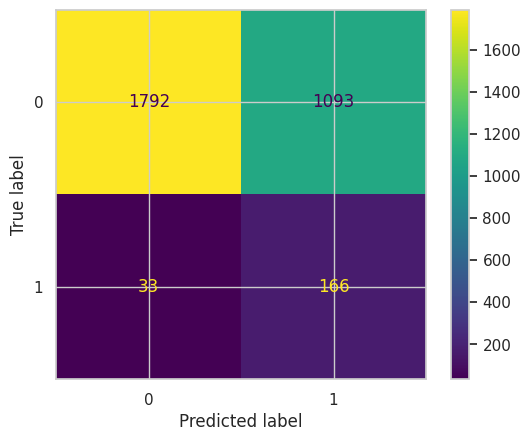

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb_near,
                              display_labels=xgb_near.classes_)
disp.plot()

plt.show()

#### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create an XGBoost model
knn_model = KNeighborsClassifier()

In [ ]:
# Train the model on the training set
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

In [ ]:
# Calculate AUC-PR
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
auc_knn = auc(recall_knn, precision_knn)
print("AUC-PR:", auc_knn)

AUC-PR: 0.24172319053447186


In [ ]:
# Display results
print(f'Accuracy: {accuracy_knn:.4f}')
print('Classification Report:')
print(class_report_knn)

Accuracy: 0.7283
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2885
           1       0.09      0.35      0.14       199

    accuracy                           0.73      3084
   macro avg       0.52      0.55      0.49      3084
weighted avg       0.89      0.73      0.79      3084



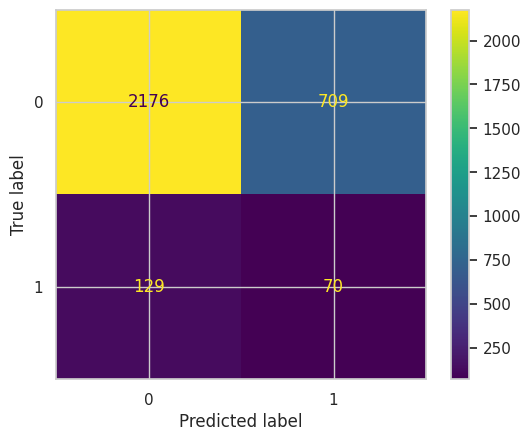

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn,
                              display_labels=knn_model.classes_)
disp.plot()

plt.show()

### Fine Tuning